In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr


import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_excel("image_data_complete_oldMLI.xlsx")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   indx                       424 non-null    int64  
 1   day                        424 non-null    int64  
 2   slide                      424 non-null    int64  
 3   subslide                   424 non-null    int64  
 4   tissue area fraction       424 non-null    float64
 5   length of tissue (px)      424 non-null    int64  
 6   width of tissue (px)       424 non-null    float64
 7   number_of_lumens           424 non-null    int64  
 8   R_equiv                    424 non-null    float64
 9   Rmidpoint                  424 non-null    float64
 10  T_tilde                    424 non-null    float64
 11  area of tissue (px^2)      424 non-null    float64
 12  area of tissue se1         424 non-null    float64
 13  area of tissue se2         424 non-null    float64

In [9]:
df2 = df.loc[:,['corrected_lumens', 'number_of_lumens','num_int_lumens_p_half_ext']]


In [10]:
df2.corr()

,corrected_lumens,number_of_lumens,num_int_lumens_p_half_ext
corrected_lumens,1.000000,0.999926,0.995881
number_of_lumens,0.999926,1.000000,0.995718
num_int_lumens_p_half_ext,0.995881,0.995718,1.000000


In [15]:
pearsonr(df2.iloc[:,1],df2.iloc[:,2])

PearsonRResult(statistic=0.9957180452328355, pvalue=0.0)

In [19]:
rho = df2.corr()
df2.corr(method=lambda x, y: pearsonr(x, y)[1])

,corrected_lumens,number_of_lumens,num_int_lumens_p_half_ext
corrected_lumens,0.0,0.0,0.0
number_of_lumens,0.0,0.0,0.0
num_int_lumens_p_half_ext,0.0,0.0,0.0


In [20]:
from scipy.stats import wasserstein_distance

In [21]:
wasserstein_distance(df2.iloc[:,1],df2.iloc[:,2])

13.020047169811322

In [22]:
wasserstein_distance(df2.iloc[:,0],df2.iloc[:,2])

2.3405205767031587

In [25]:
df2 = df2.assign(error_corrected_count = lambda x: (abs(x['corrected_lumens']-x['num_int_lumens_p_half_ext']) /x['num_int_lumens_p_half_ext']))

df2 = df2.assign(error_original_count = lambda x: (abs(x['number_of_lumens']-x['num_int_lumens_p_half_ext']) /x['num_int_lumens_p_half_ext']))


<AxesSubplot: >

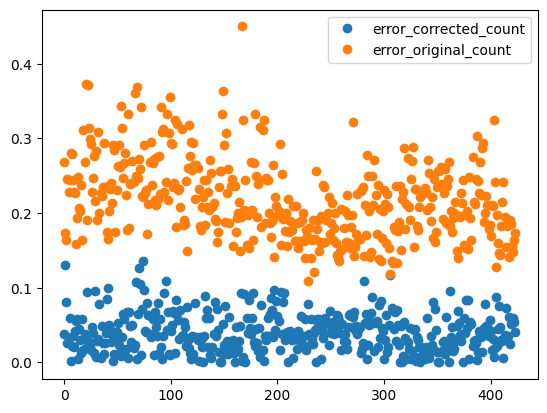

In [33]:
df2[['error_corrected_count','error_original_count']].plot(marker = 'o',linestyle=' ')